https://www.kaggle.com/competitions/instacart-market-basket-analysis/overview

# PUBG Finish Placement Prediction

## 1. Description
- In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive knocked teammates, drive vehicles, swim, run, shoot, and experience all of the consequences - such as falling too far or running themselves over and eliminating themselves.

- The dataset contains a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

- The goal is to predict players' finishing placement (winPlacePerc) based on their final stats, on a scale from 1 (first place) to 0 (last place). 

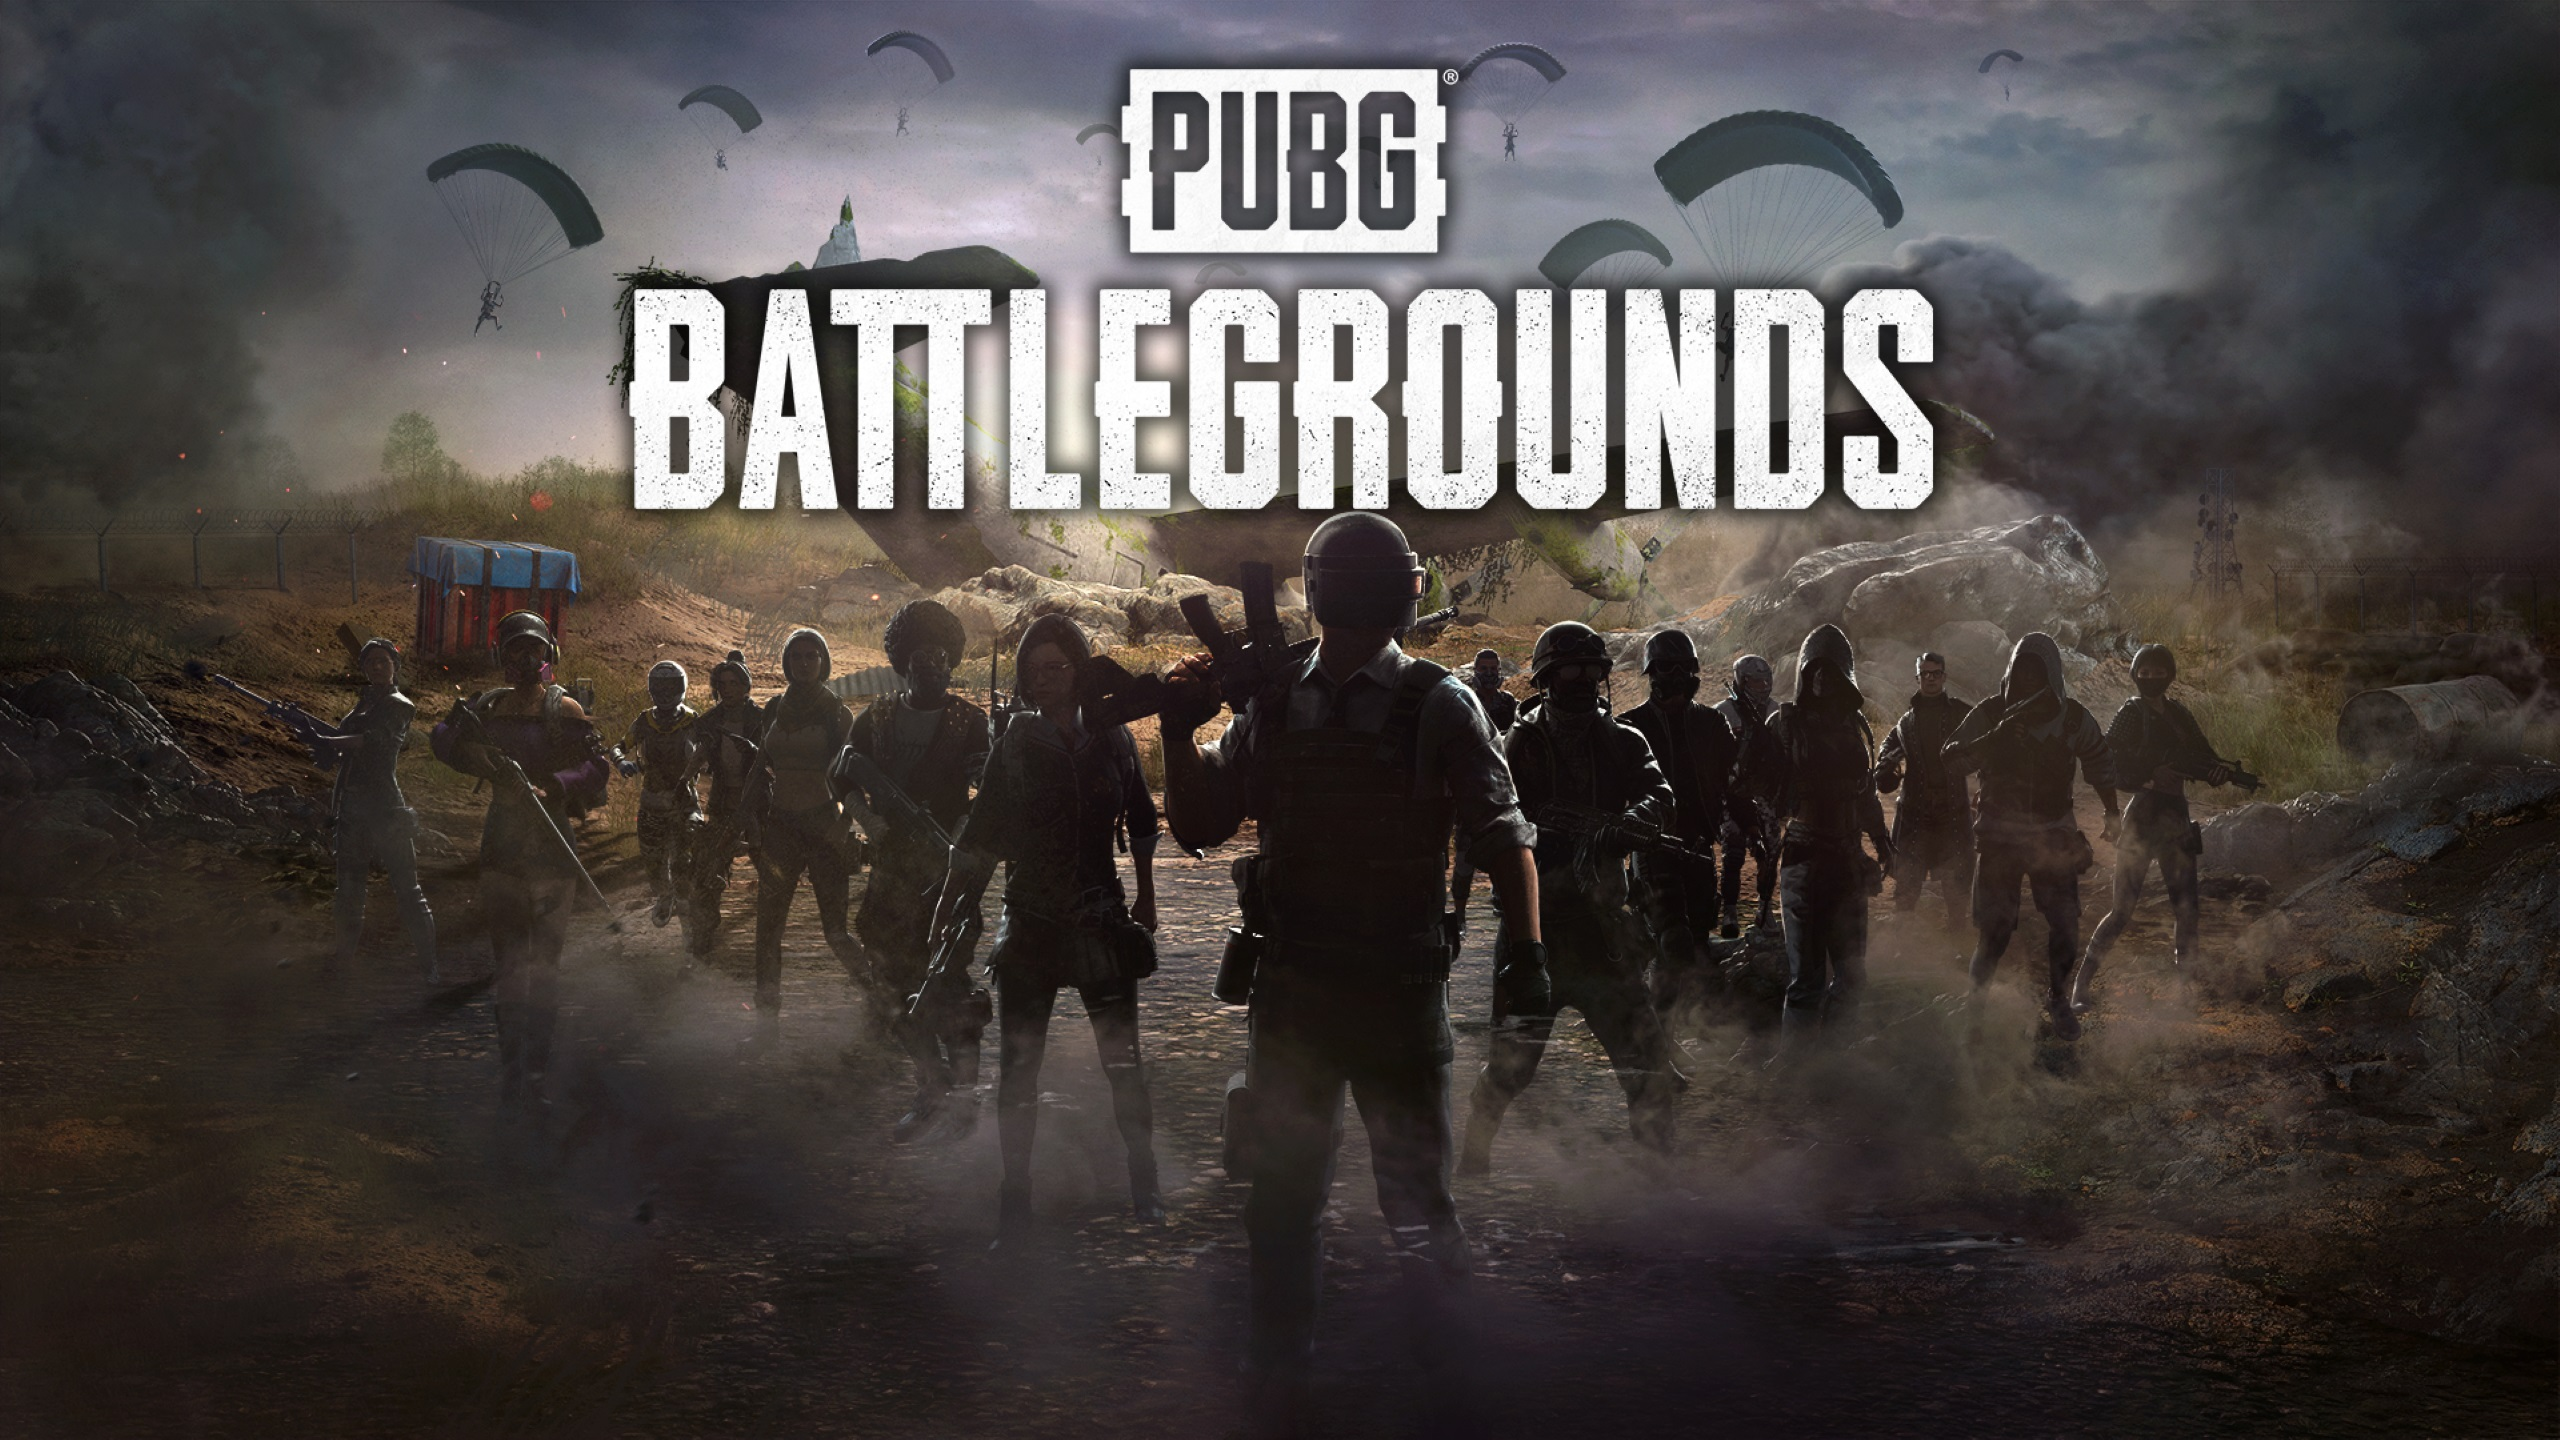

In [1]:
import requests
import IPython.display as Disp
url = 'https://cdn1.epicgames.com/spt-assets/53ec4985296b4facbe3a8d8d019afba9/pubg-battlegrounds-offer-nyz0s.jpg'
Disp.Image(requests.get(url).content, width = 600, height = 200)

## 2. Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test_comp = pd.read_csv("./test_V2.csv")
data = pd.read_csv("./train_V2.csv")

In [4]:
data.shape

(4446966, 29)

In [5]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [6]:
test_comp.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [7]:
print(data.shape, test_comp.shape) # the test data for competition has no y variable.

(4446966, 29) (1934174, 28)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [10]:
null_count = data.isnull().sum().sort_values() # there is one null in the y variable
print('null count:', null_count[null_count > 0])

null count: winPlacePerc    1
dtype: int64


In [11]:
for i in ['Id','groupId','matchId']: # each userID is unique, but not groupID or matchID.
    print(f'unique [{i}] count:', data[i].nunique())

unique [Id] count: 4446966
unique [groupId] count: 2026745
unique [matchId] count: 47965


In [12]:
print(data['kills'].mean())
print(data['kills'].quantile(0.75))
print(data['kills'].quantile(0.99))
print(data['kills'].max())

0.9247833241810259
1.0
7.0
72


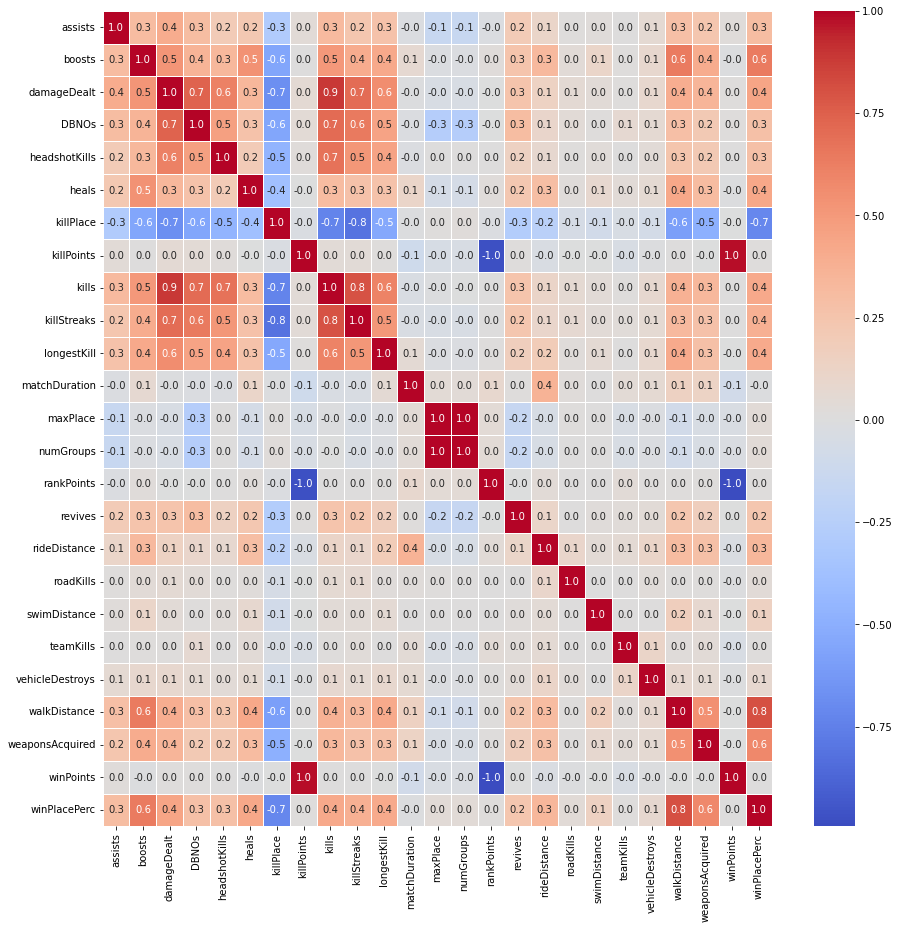

In [13]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="coolwarm")
plt.show()

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


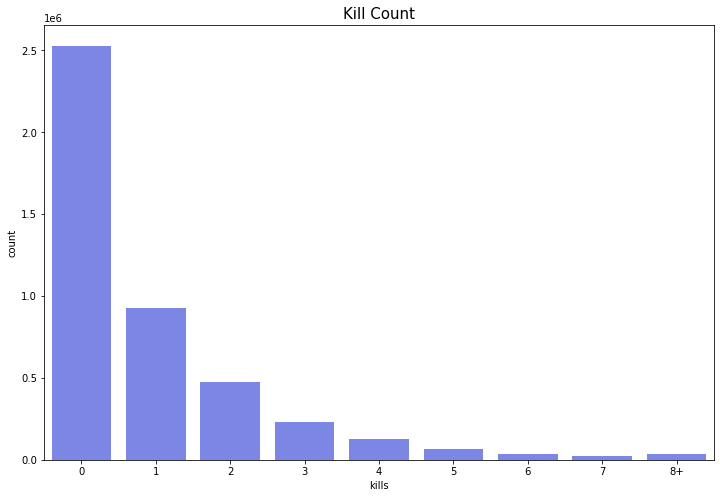

In [14]:
data_copy = data.copy()
data_copy.loc[data['kills'] > data_copy['kills'].quantile(0.99)] = '8+'
plt.figure(figsize = (12,8))
sns.countplot(data_copy['kills'].astype('str').sort_values(), color = '#6a79f7')
plt.title("Kill Count",fontsize=15)
plt.show()

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


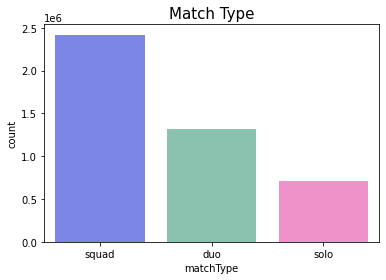

In [16]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data_copy['matchType'] = data_copy['matchType'].apply(mapper)

plt.figure(figsize = (6,4))
sns.countplot(data_copy['matchType'],
             order = data_copy['matchType'].value_counts().iloc[:7].index,
             palette=['#6a79f7','#82cbb2','#fe83cc'])
plt.title("Match Type",fontsize = 15)
plt.show()


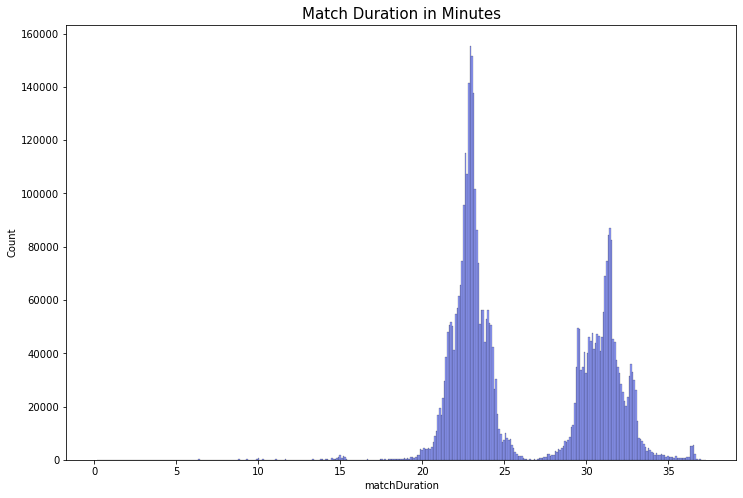

In [17]:
data_copy = data.copy()
data_copy['matchDuration'] = data_copy['matchDuration'].div(60)
plt.figure(figsize=(12,8))
sns.histplot(data = data_copy, x = 'matchDuration', color = '#6a79f7')
plt.title("Match Duration in Minutes",fontsize=15)
plt.show()

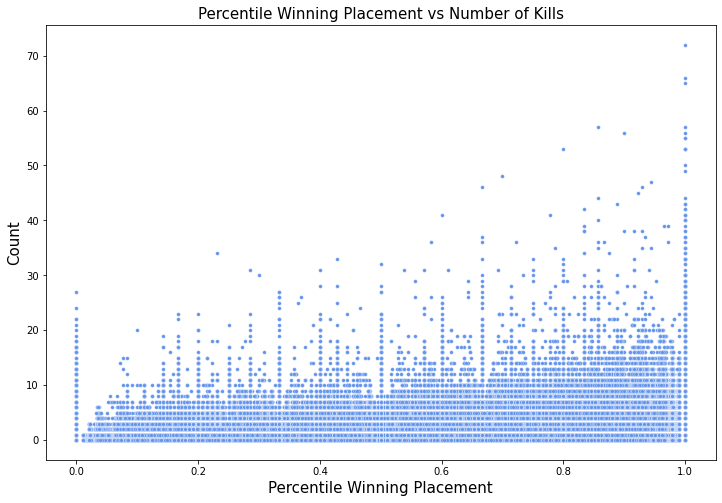

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = 'winPlacePerc', y = 'kills', s=14, color = 'cornflowerblue')
plt.title("Percentile Winning Placement vs Number of Kills",fontsize=15)
plt.xlabel('Percentile Winning Placement',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


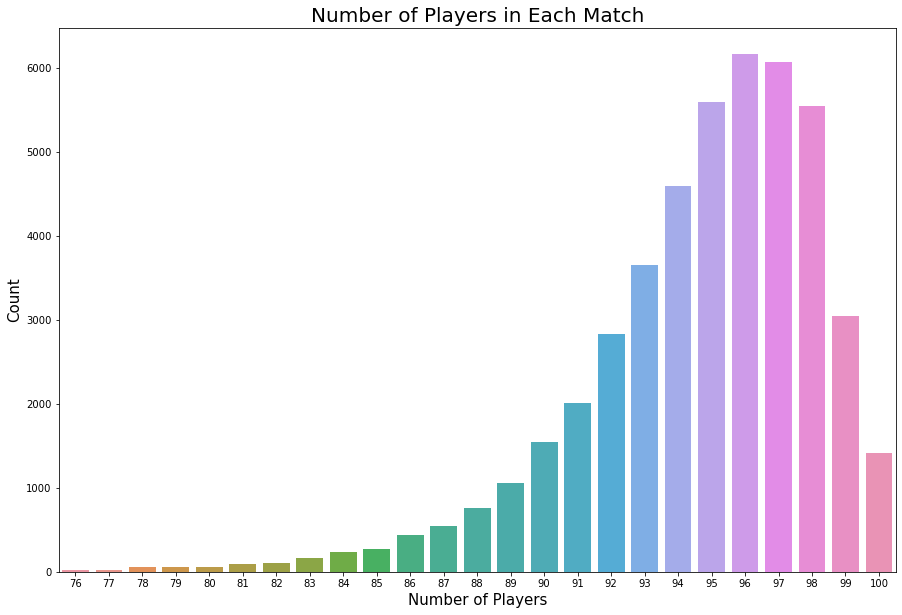

In [19]:
match_counts = data.groupby('matchId')['Id'].count()
plt.figure(figsize=(15,10))
sns.countplot(match_counts[match_counts > 75])
plt.title('Number of Players in Each Match',fontsize = 20)
plt.xlabel('Number of Players',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

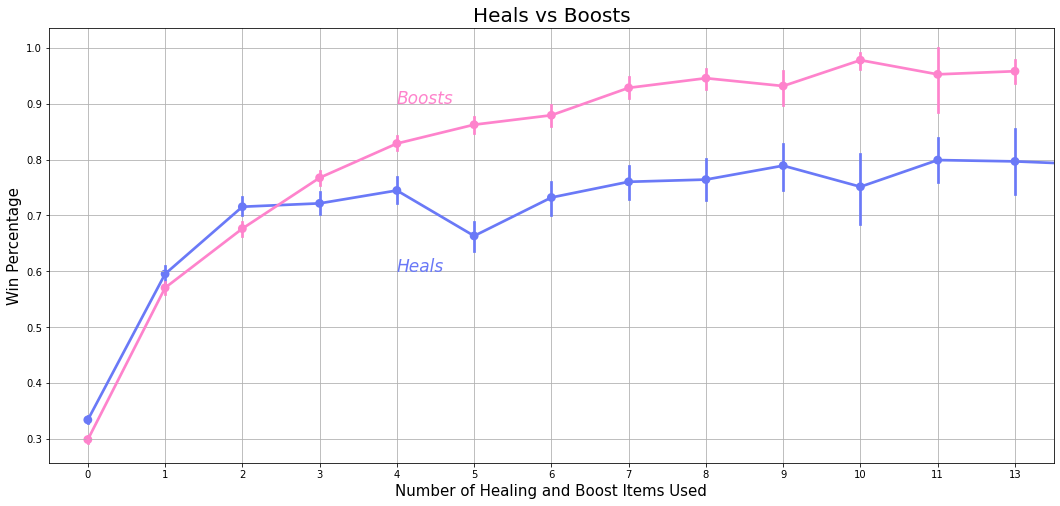

In [20]:
f,ax1 = plt.subplots(figsize =(18,8))
sns.pointplot(data = data[:10000], x = "heals", y = "winPlacePerc", color = '#6a79f7')
sns.pointplot(data = data[:10000], x = 'boosts', y = 'winPlacePerc', color = '#fe83cc')
plt.text(4,0.6,'Heals',color='#6a79f7',fontsize = 17,style = 'italic')
plt.text(4,0.9,'Boosts',color='#fe83cc',fontsize = 17,style = 'italic')
plt.xlabel('Number of Healing and Boost Items Used',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Heals vs Boosts',fontsize = 20)
plt.grid()
plt.show()

## 3. Feature Engineering

In [21]:
# Dropping IDs as they are not relevant features.
# Each user, group, and match is unique and do not reappear in the test data)

data.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)
test_comp.drop(['Id', 'groupId', 'matchId'], axis=1, inplace=True)
print(data.shape)
print(test_comp.shape)

(4446966, 26)
(1934174, 25)


In [22]:
# Dropping N/A in the y variable

data.dropna(subset="winPlacePerc", inplace=True)
print(data.shape)

(4446965, 26)


In [23]:
# Transforming the distance variables into proportions

dist_cols = ['walkDistance', 'swimDistance', 'rideDistance']
for col in dist_cols:
    col_name = '{}_pct'.format(col)
    data[col_name] = (data[col] / data[dist_cols].sum(axis=1).clip(lower=0.0001))

In [24]:
# Log transformation of the kill variables 

kill_cols = ['killPoints', 'kills', 'killStreaks']
for col in kill_cols:
    col_name = '{}_log1'.format(col)
    data[col_name] = np.log1p(data[col])

In [25]:
# Combine the heal and boost variables as they serve similar functions

data['healboost'] = data['heals'] + data['boosts']
data = data.drop(['heals', 'boosts'], axis = 1)

In [26]:
data.shape

(4446965, 31)

In [27]:
# Standard-scaling the data

from sklearn import preprocessing
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'winPlacePerc']
scaler = preprocessing.StandardScaler().fit(data.loc[:,numeric_cols]) # scale numerical columns only
X_scaled = scaler.transform(data.loc[:, numeric_cols])

In [28]:
X_scaled.shape

(4446965, 29)

In [29]:
# Join X_scaled to categorical vars in original data 

numeric_df = pd.DataFrame(X_scaled, columns = numeric_cols) #4446965
numeric_df = numeric_df.reset_index(drop=True)
X_categorical = data.drop(columns = numeric_cols).reset_index(drop=True) #4446965
X_scaled = pd.concat([numeric_df,X_categorical], axis = 1)
X_scaled.shape

(4446965, 31)

In [30]:
# Convert string variables (matchType) to dummies

X_scaled = pd.get_dummies(X_scaled) 
test_comp = pd.get_dummies(test_comp)

In [31]:
X_scaled.head()

,assists,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,-0.397257,-0.765410,-0.574191,-0.37668,0.451541,1.172889,-0.593402,-0.765087,-0.451176,-1.057077,...,0,0,0,0,0,0,0,0,0,1
1,-0.397257,-0.229810,-0.574191,-0.37668,0.342303,-0.804784,-0.593402,-0.765087,-0.451176,0.763292,...,0,0,0,0,0,0,0,0,0,1
2,1.301767,-0.367238,-0.574191,-0.37668,-0.021824,-0.804784,-0.593402,-0.765087,-0.451176,-1.010698,...,0,0,0,0,0,0,0,0,0,0
3,-0.397257,-0.572765,-0.574191,-0.37668,0.997732,-0.804784,-0.593402,-0.765087,-0.451176,-0.554640,...,0,0,0,0,0,0,0,0,0,1
4,-0.397257,-0.179863,-0.574191,-0.37668,-0.094650,-0.804784,0.048264,0.641438,0.697088,-0.601018,...,0,0,0,0,0,0,0,1,0,0


## 4. Train, Test, and Validation Split

In [32]:
X_scaled = X_scaled.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

# train: 75%, test: 25%
# 3-Fold cross-validation using the train set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [33]:
print(X_scaled.shape)
print(X_train.shape)
print(X_test.shape)

(4446965, 45)
(3335223, 45)
(1111742, 45)


## 5. Model Selection and Validation


It was not possible to finish running the GB Regressor model using the entire dataset within the reasonable timeframe on my computer. My code only uses the first 10,000 data points from the training set and 3,333 data points from the test set. While it does not take a long time to run some of the other models using the entire dataset, for comparability purpose I am using this same subset for all of the models I am using. 

#### Evaluation Metric
I used the mean absolute error(MAE) as my choice of evaluation metric, calculated as the sum of errors (difference bewteen the predicted percentile winning placement and the observed percentile winning placement) divided by the sample size. The use of MAE is required for this competition. MAE is less sensitive to outlier values compared to MSE . In online games where one player's performance significantly varies from others, the presence of outlier is common, which is probably why MAE is a better choice than MSE for this dataset. 


#### Validation Procedure
I used K-fold cross validation for my validation procedure. I used k = 3 due to limitations in computing power, but in ideal case I would use a higher k. I chose K-fold CV over hold-out validation because it provides more reliable estimate of the performance of my model by reducing the variance in the estimated performance. In K-fold CV, the model is trained and evaluated on all instances in the dataset, rather than just a single random split. It also ensures that each instance is used for both training and validation exactly once, which can help to reduce overfitting.

I tuned the hyperparamters using GridSearchCV and used the optimal parameters to fit the test data for each model.


### 1. Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Fit model

gbr_params = {'n_estimators' : [100,200],
            'max_depth'    : [4,8]
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 3)
fit_gb = gr_gb.fit(X_train.iloc[:10000,:], y_train.iloc[:10000])
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [35]:
# Test set prediction

from sklearn import metrics

y_hat_gb_test = fit_gb.predict(X_test.iloc[:3333,:])
mae_test_gb = metrics.mean_absolute_error(y_test.iloc[:3333], y_hat_gb_test)

print(mae_test_gb)

0.06426962063207316


### 2. Ridge Regression

In [36]:
# Fit model

from sklearn import linear_model

ridge_params = {'alpha': [0.1, 1, 5, 10, 20]}

model_ridge = linear_model.Ridge()
gr_ridge = GridSearchCV(model_ridge, param_grid = ridge_params, cv = 3)
fit_ridge = gr_ridge.fit(X_train.iloc[:10000,:], y_train.iloc[:10000])
print(fit_ridge.best_estimator_)

Ridge(alpha=1)


In [37]:
# Test set prediction

y_hat_ridge_test = fit_ridge.predict(X_test.iloc[:3333,:])
mae_test_ridge = metrics.mean_absolute_error(y_test.iloc[:3333], y_hat_ridge_test)
print(mae_test_ridge)

0.08095043365687092


### 3. Lasso Regression

In [38]:
# Fit model

lasso_params = {'alpha': [0.1, 1, 5, 10, 20]}

model_lasso = linear_model.Lasso()
gr_lasso = GridSearchCV(model_lasso, param_grid = ridge_params, cv = 3)
fit_lasso = gr_lasso.fit(X_train.iloc[:10000,:], y_train.iloc[:10000])
print(fit_lasso.best_estimator_)

Lasso(alpha=0.1)


In [39]:
# Test set prediction

y_hat_lasso_test = fit_lasso.predict(X_test.iloc[:3333,:])
mae_test_lasso = metrics.mean_absolute_error(y_test.iloc[:3333], y_hat_lasso_test)
print(mae_test_lasso)

0.15877362095340244


### 4. Random Forest

In [40]:
# Fit model

from sklearn.ensemble import RandomForestRegressor

random_params = {'max_features':[1.0, 'sqrt'],
                 'n_estimators': [50, 100]
                }
model_random = RandomForestRegressor()
gr_random = GridSearchCV(model_random, param_grid = random_params, cv = 3)
fit_random = gr_random.fit(X_train.iloc[:10000,:], y_train.iloc[:10000])
print(fit_random.best_estimator_)

RandomForestRegressor(max_features=1.0)


In [41]:
# Test set prediction

y_hat_random_test = fit_random.predict(X_test.iloc[:3333,:])
mae_test_lasso = metrics.mean_absolute_error(y_test.iloc[:3333], y_hat_random_test)
print(mae_test_lasso)

0.06908280288028804


### 5. Decision Tree


In [42]:
# Fit model

from sklearn.tree import DecisionTreeRegressor

random_params = {'max_depth':[4, 6, 8]
                }
model_tree = DecisionTreeRegressor()
tr = GridSearchCV(model_tree, param_grid = random_params, cv = 3)
fit_tr = tr.fit(X_train.iloc[:10000,:], y_train.iloc[:10000])
print(fit_tr.best_estimator_)

DecisionTreeRegressor(max_depth=8)


In [43]:
# Test set prediction

y_hat_tree_test = fit_random.predict(X_test.iloc[:1250,:])
mae_test_lasso = metrics.mean_absolute_error(y_test[:1250], y_hat_tree_test)
print(mae_test_lasso)

0.06975878640000001


## 5. Results and Analysis


### Model Section
I chose the gradient boosting regressor as it has the smallest mean absolute error (0.0643) out of all five models. 





### Feature Importance

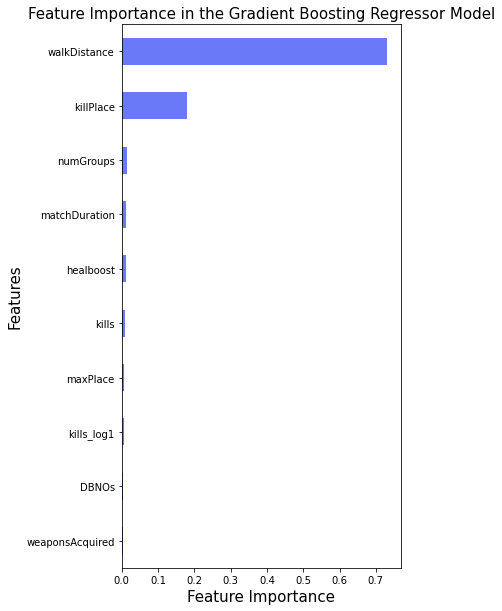

In [44]:
# Get Feature importance data using feature_importances_ attribute
from matplotlib.pyplot import cm

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()
